In [16]:

# import numpy as np
from qiskit import QuantumCircuit, transpile
# from qiskit.quantum_info import Kraus, SuperOp
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram
q=QuantumCircuit(8)
q.initialize([0,1],0)
q.initialize([0,1],1)
q.initialize([0,1],2)
q.initialize([1,0],3)

for i in [4,5,6,7]:
    q.initialize([1,0],i)

q.toffoli(0,2,4)
q.cnot(1,3)
q.cnot(3,7)
q.toffoli(4,7,5)
q.cnot(4,7)
q.toffoli(0,2,4)
q.toffoli(1,3,6)
q.toffoli(6,5,4)
q.cnot(6,4)
q.cnot(4,5)
q.toffoli(1,3,6)
q.cnot(0,2)
q.cnot(2,6)
q.cnot(1,3)
q.cnot(0,2)
q.measure_all()
q.draw()

┌─────────────────┐                                                  »
   q_0: ┤ Initialize(0,1) ├──■─────────────────────────────■────■────────────»
        ├─────────────────┤  │                             │    │            »
   q_1: ┤ Initialize(0,1) ├──┼────■──────────────■─────────┼────┼────────────»
        ├─────────────────┤  │    │              │         │  ┌─┴─┐          »
   q_2: ┤ Initialize(0,1) ├──■────┼──────────────┼─────────■──┤ X ├──────────»
        ├─────────────────┤  │  ┌─┴─┐            │         │  └───┘          »
   q_3: ┤ Initialize(1,0) ├──┼──┤ X ├──■─────────■─────────┼─────────────────»
        ├─────────────────┤┌─┴─┐└───┘  │         │       ┌─┴─┐┌───┐┌───┐     »
   q_4: ┤ Initialize(1,0) ├┤ X ├───────┼────■────┼────■──┤ X ├┤ X ├┤ X ├──■──»
        ├─────────────────┤└───┘       │  ┌─┴─┐  │    │  └───┘└─┬─┘└─┬─┘┌─┴─┐»
   q_5: ┤ Initialize(1,0) ├────────────┼──┤ X ├──┼────┼─────────■────┼──┤ X ├»
        ├─────────────────┤            │  └─┬─┘┌─┴─┐  │         │    │  └───┘»
   q_6: ┤ Initialize(1,0) ├────────────┼────┼──┤ X ├──┼─────────■────■───────»
        ├─────────────────┤          ┌─┴─┐  │  └───┘┌─┴─┐                    »
   q_7: ┤ Initialize(1,0) ├──────────┤ X ├──■───────┤ X ├────────────────────»
        └─────────────────┘          └───┘          └───┘                    »
meas: 8/═════════════════════════════════════════════════════════════════════»
                                                                             »
«                             ░ ┌─┐                     
«   q_0: ─────────────────■───░─┤M├─────────────────────
«                         │   ░ └╥┘┌─┐                  
«   q_1: ──■─────────■────┼───░──╫─┤M├──────────────────
«          │         │  ┌─┴─┐ ░  ║ └╥┘┌─┐               
«   q_2: ──┼────■────┼──┤ X ├─░──╫──╫─┤M├───────────────
«          │    │  ┌─┴─┐└───┘ ░  ║  ║ └╥┘┌─┐            
«   q_3: ──■────┼──┤ X ├──────░──╫──╫──╫─┤M├────────────
«          │    │  └───┘      ░  ║  ║  ║ └╥┘┌─┐         
«   q_4: ──┼────┼─────────────░──╫──╫──╫──╫─┤M├─────────
«          │    │             ░  ║  ║  ║  ║ └╥┘┌─┐      
«   q_5: ──┼────┼─────────────░──╫──╫──╫──╫──╫─┤M├──────
«        ┌─┴─┐┌─┴─┐           ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
«   q_6: ┤ X ├┤ X ├───────────░──╫──╫──╫──╫──╫──╫─┤M├───
«        └───┘└───┘           ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
«   q_7: ─────────────────────░──╫──╫──╫──╫──╫──╫──╫─┤M├
«                             ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
«meas: 8/════════════════════════╩══╩══╩══╩══╩══╩══╩══╩═
«                                0  1  2  3  4  5  6  7

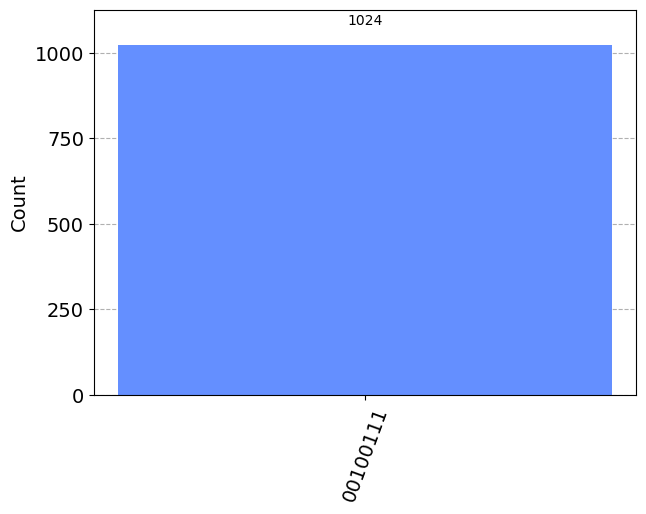

In [17]:
sim_ideal = AerSimulator()
result_ideal = sim_ideal.run(q).result()
plot_histogram(result_ideal.get_counts(0))